In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd

import matplotlib
# %matplotlib inline


print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-10-31 12:12:46.824929: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-31 12:12:46.846647: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 12:12:46.846667: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 12:12:46.846681: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 12:12:46.850621: I tensorflow/core/platform/cpu_feature_g

Num GPUs Available:  1


2023-10-31 12:12:48.077699: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 12:12:48.080647: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 12:12:48.080725: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

The first value of x_test is 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0

2023-10-31 12:12:50.804632: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 12:12:50.804752: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 12:12:50.804812: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/3


2023-10-31 12:12:52.104775: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-31 12:12:52.488515: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f05f0c6b630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-31 12:12:52.488534: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4500, Compute Capability 8.6
2023-10-31 12:12:52.491887: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-31 12:12:52.564624: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-10-31 12:12:52.616421: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.5271 - accuracy: 0.8145 - val_loss: 0.4195 - val_accuracy: 0.8544
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3982 - accuracy: 0.8544 - val_loss: 0.3770 - val_accuracy: 0.8636
Epoch 3/3
313/313 [==============================] - 0s 750us/step - loss: 0.3662 - accuracy: 0.8707
INFO:tensorflow:Assets written to: MNIST_Example1_NN_Model/assets


INFO:tensorflow:Assets written to: MNIST_Example1_NN_Model/assets


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157 0.         0.2627451  0.69411765
  0.50588235 0.6        0.45882353 0.50588235 0.57254902 0.55294118
  0.68627451 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00784314 0.         0.76862745 1.
  1.         1.         0.94509804 0.98431373 1.         0.96078431
  1.         0.29803922 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.95294118 0.92941176
  0.85098039 0.89411765 0.90588235 0.87058824 0.85490196 0.85882353
  1.         0.45490196 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.  

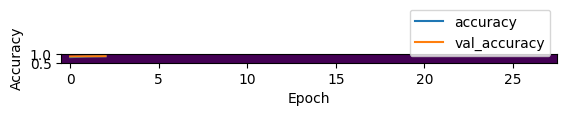

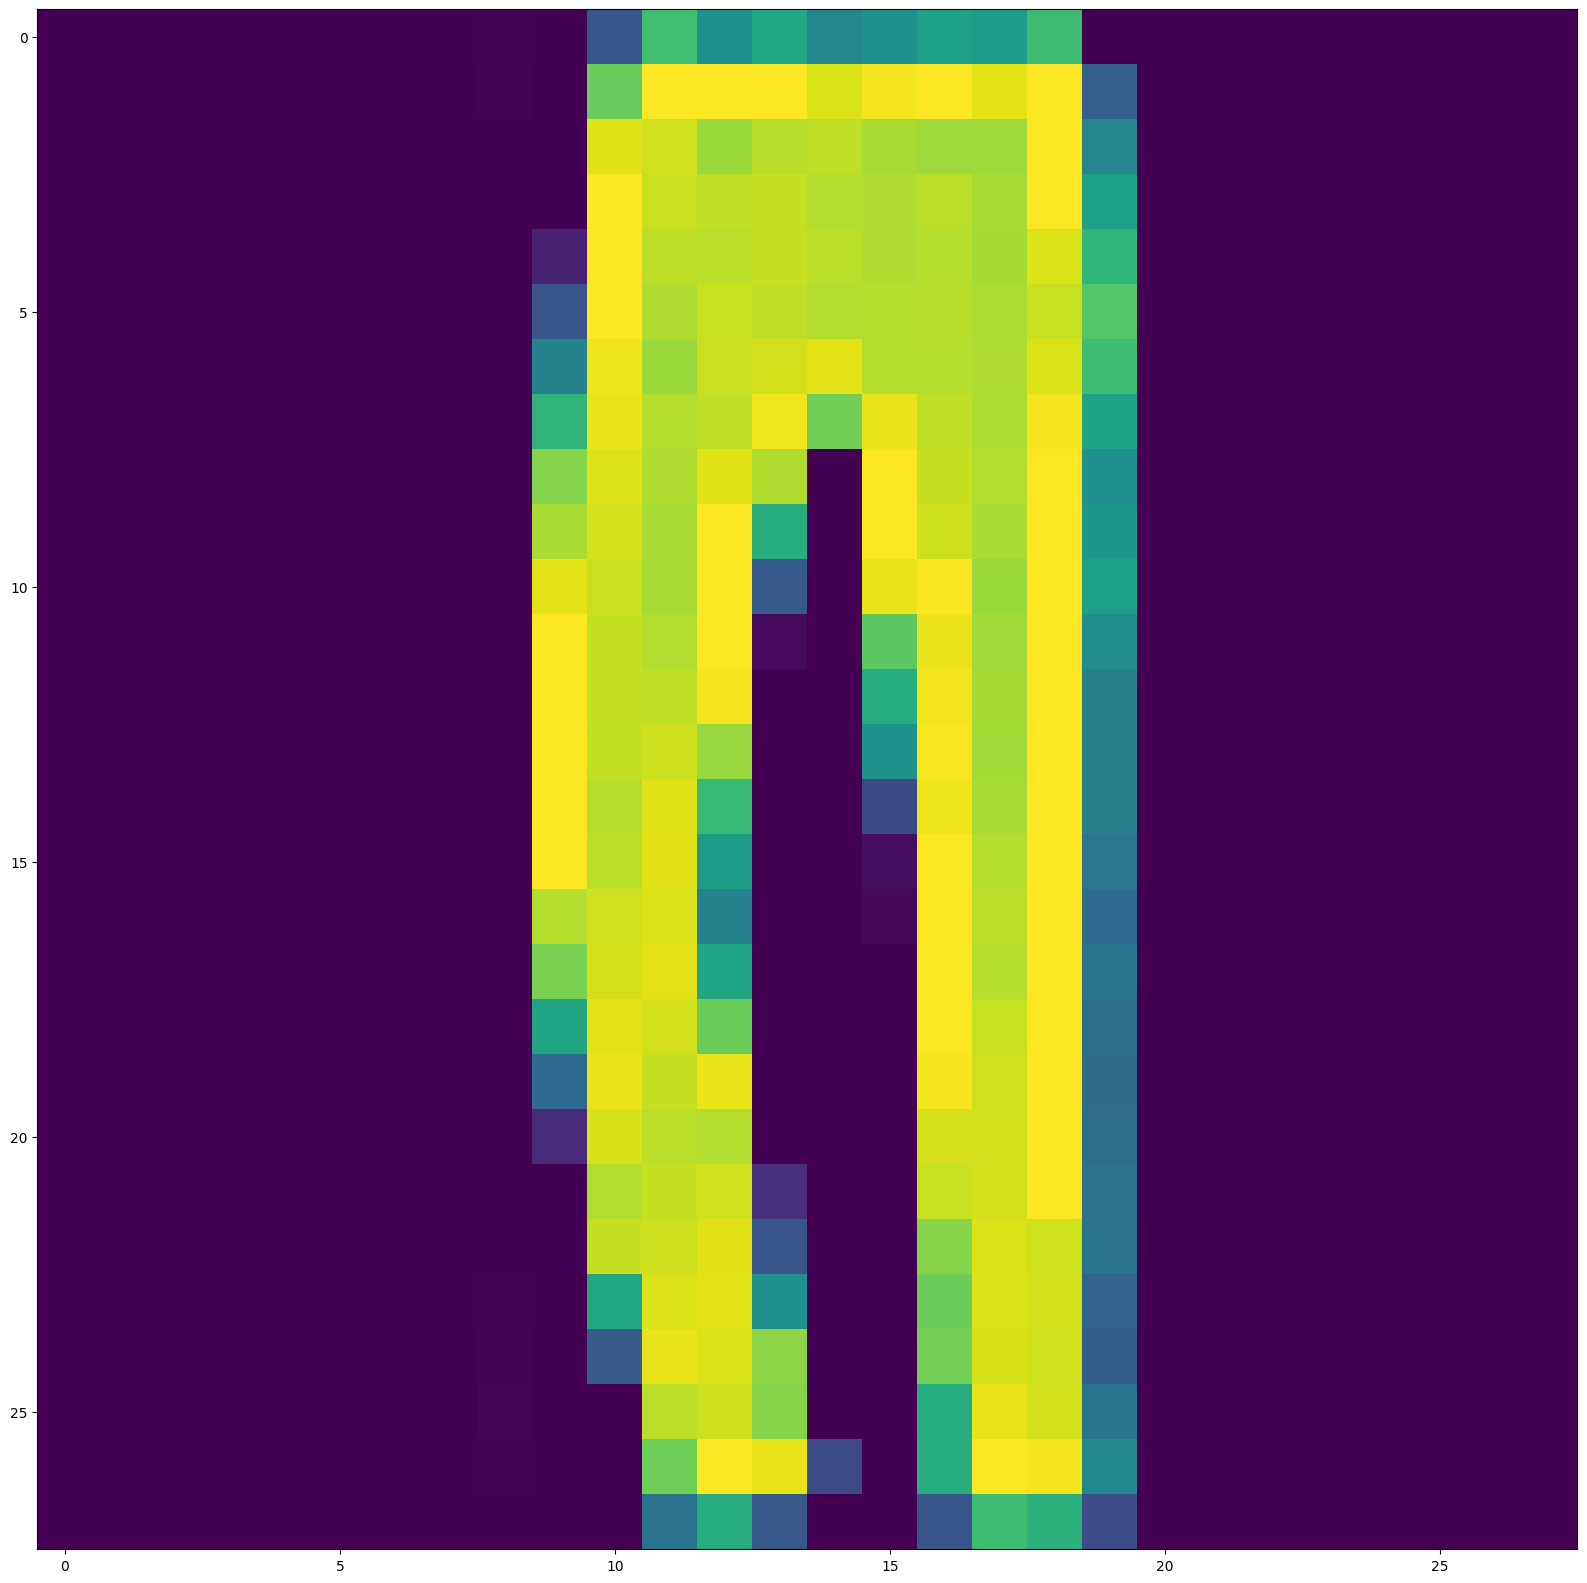

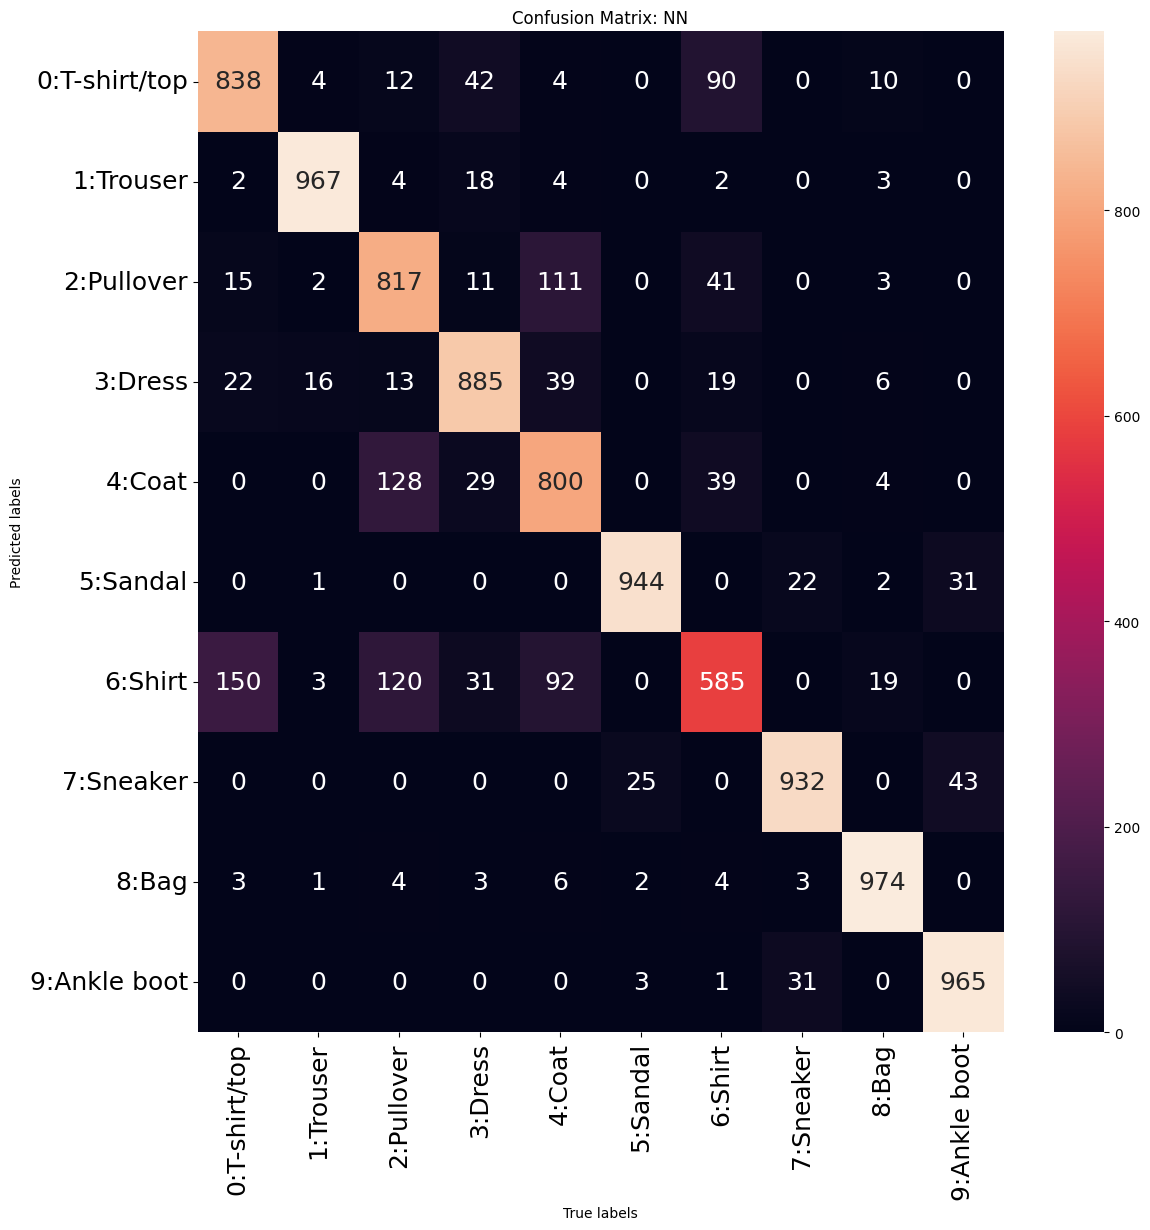

In [3]:


## Getting the data loaded and ready

## Other similar datasets....
## mnist = tf.keras.datasets.mnist 
#Data_=tf.keras.datasets.imdb

Data_=tf.keras.datasets.fashion_mnist
## Load the data....
(x_train, y_train),(x_test, y_test) = Data_.load_data()

## What does the data look like?
print("The first value of x_test is \n", x_test[0])
print("The shape of x_test is \n", x_test.shape)
print("The first value of x_train is \n", x_train[0])
print("The shape of x_train is \n", x_train.shape)
print("The first value of y_test is \n", y_test[0])
print("The shape of y_test is \n", y_test.shape)
print("The first value of y_train is \n", y_train[0])
print("The shape of y_train is \n", y_train.shape)
print("The first few values of y_test are \n", y_test[0:3])

print("The first value - label - of y-test is a ",y_test[0], "and it looks like this:\n")
plt.imshow(x_test[0]) ## NOTICE that to see the image you need x_test[0] and to see the
## numeric label you need y_test[0]

## Data Normalization
##BEFORE
print("Before normalization - x_train[0] is \n", x_train[0])
x_train, x_test = x_train / 255.0, x_test / 255.0
##AFTER
print("After normalization - x_train[0] is \n", x_train[0])
## NOTE - we DO NOT normalize y. Why not?

##########################################
## Using Keras
#################################################

## Step 1

## Create a TF - Keras NN Model

## https://keras.io/guides/sequential_model/
## The Sequential Model:
    ## A Sequential model is appropriate for a plain stack 
    ## of layers where each layer has exactly one input tensor 
    ## and one output tensor.
    ## Tensors are multi-dimensional arrays with a uniform type.
    ## A tensor with one dimension can be thought of as a vector, 
    ## A tensor with two dimensions as a matrix and 
    ## A tensor with three dimensions can be thought of as a cuboid. 
    ## A Sequential model is **not** appropriate when:
        ##Your model has multiple inputs or multiple outputs
        ##Any of your layers has multiple inputs or multiple outputs
        ## etc. 
    ## all layers in Keras need to know the shape of their 
    ## inputs in order to be able to create their weights.
    
NN_Model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), ##(None,784)
  # Dense implements the operation: 
      ## output = activation(dot(input, kernel) + bias)
      ## The "kernel" are the weights matrix.
  tf.keras.layers.Dense(128, activation='relu'), #https://keras.io/api/layers/core_layers/dense/
  ## The first value, 128 here, are the units.
  ## units: Positive integer, dimensionality of the output space.
  ## Here, x_train is (60000,28,28)
  ## This Dense Layer output will be (None, 128)
  ## https://www.tutorialspoint.com/keras/keras_dense_layer.htm
  
  tf.keras.layers.Dropout(0.2), ##(None, 128)
  tf.keras.layers.Dense(10, activation='softmax') ## (None, 10)
])
    
NN_Model.summary()

## -------
## Step 2 - 
## Compile the Model
## -------
NN_Model.compile(
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"],
                 optimizer='adam'
                 
                 )


## ----------
## Step 3 - 
## Fit the Model to the data (train the model)
## -------

## Making the number of epochs larger can improve the model and prediction accuracy
Hist=NN_Model.fit(x_train,y_train, epochs=3,validation_data=(x_test, y_test))


###### History and Accuracy
plt.plot(Hist.history['accuracy'], label='accuracy')
plt.plot(Hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

##Test and Model
Test_Loss, Test_Accuracy = NN_Model.evaluate(x_test, y_test)

## Save the Model
NN_Model.save("MNIST_Example1_NN_Model")

## Predictions
## RE: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
print(x_test[2])
print(x_test[2].shape)
plt.figure(figsize = (20,20))
plt.imshow(x_test[2]) ## x_test[2] is the third test vector. Its label is a 1
print("The label of this test image is \n", y_test[2])  ## Label of x_test[2]

## All predictions
predictions=NN_Model.predict([x_test])
print("All of the predictions for the test data are \n", predictions) ## All the predictions (all 10,000)
print("The single prediction vector for x_test[2] is \n", predictions[2]) ## Just the third prediction
print("The max - final prediction label for x_test[2] is\n", np.argmax(predictions[2])) ## The argmax of the third prediction - this is the label

## Print the prediction to compare
GetPredictedImage=x_test[y_test==np.argmax(predictions[2])][0]
## The above prints the first example that matches the predicted label
plt.imshow(GetPredictedImage)

## Confusion Matrix and Accuracy - and Visual Options
print("The test accuracy is \n", Test_Accuracy)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print("The prediction accuracy via confusion matrix is:\n")
print(y_test)
print(predictions)
print(predictions.shape)  ##(10000,10)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1)))
print(Max_Values)
print(np.argmax([predictions]))
print(confusion_matrix(Max_Values, y_test))

## Pretty Confusion Matrix
#from sklearn.metrics import confusion_matrix
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cm = confusion_matrix(y_test, Max_Values, labels=labels)
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt     

fig, ax = plt.subplots(figsize=(13,13)) 
#ax= plt.subplot()
#sns.set(font_scale=3)
#sns.set (rc = {'figure.figsize':(40, 40)})
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})
#annot=True to annotate cells, ftm='g' to disable scientific notation
# annot_kws si size  of font in heatmap
# labels, title and ticks
ax.set_xlabel('True labels') 
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix: NN') 
ax.xaxis.set_ticklabels(["0:T-shirt/top","1:Trouser",
                         "2:Pullover","3:Dress","4:Coat",
                         "5:Sandal","6:Shirt","7:Sneaker",
                         "8:Bag","9:Ankle boot"],rotation=90, fontsize = 18)

ax.yaxis.set_ticklabels(["0:T-shirt/top","1:Trouser","2:Pullover",
                         "3:Dress","4:Coat","5:Sandal","6:Shirt",
                         "7:Sneaker","8:Bag","9:Ankle boot"],rotation=0, fontsize = 18)

plt.show()


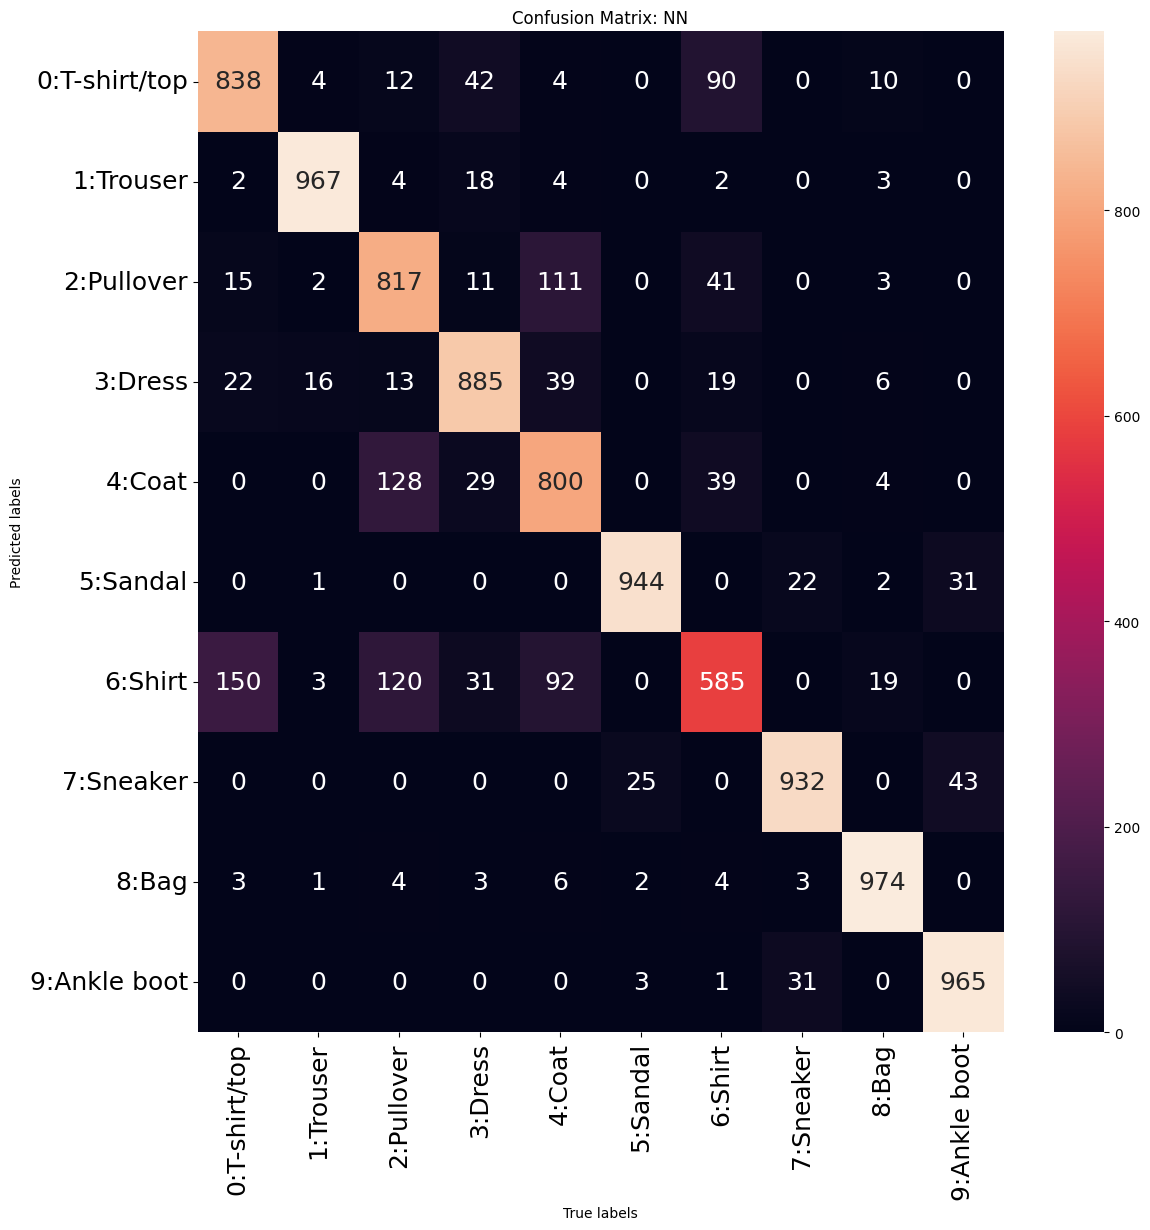

In [4]:

fig, ax = plt.subplots(figsize=(13,13)) 
#ax= plt.subplot()
#sns.set(font_scale=3)
#sns.set (rc = {'figure.figsize':(40, 40)})
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={'size': 18})
#annot=True to annotate cells, ftm='g' to disable scientific notation
# annot_kws si size  of font in heatmap
# labels, title and ticks
ax.set_xlabel('True labels') 
ax.set_ylabel('Predicted labels')
ax.set_title('Confusion Matrix: NN') 
ax.xaxis.set_ticklabels(["0:T-shirt/top","1:Trouser",
                         "2:Pullover","3:Dress","4:Coat",
                         "5:Sandal","6:Shirt","7:Sneaker",
                         "8:Bag","9:Ankle boot"],rotation=90, fontsize = 18)

ax.yaxis.set_ticklabels(["0:T-shirt/top","1:Trouser","2:Pullover",
                         "3:Dress","4:Coat","5:Sandal","6:Shirt",
                         "7:Sneaker","8:Bag","9:Ankle boot"],rotation=0, fontsize = 18)

plt.show()
